In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

# 1. Load Data
df = pd.read_csv('Combined Data.csv')

# 2. Hapus baris kosong
df = df.dropna(subset=['statement', 'status'])

# 3. Encode Label
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['status'])
num_classes = len(label_encoder.classes_)

# 4. Tokenisasi
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['statement'])

vocab_size = len(tokenizer.word_index) + 1
max_length = 100  # Panjang input yang disamakan

X = tokenizer.texts_to_sequences(df['statement'])
X = pad_sequences(X, maxlen=max_length)

y = to_categorical(df['label'], num_classes=num_classes)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Bangun Model RNN
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 7. Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 8. Evaluasi
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 117s 108ms/step - accuracy: 0.5480 - loss: 1.1864 - val_accuracy: 0.6105 - val_loss: 0.9364
Epoch 2/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 115s 109ms/step - accuracy: 0.6877 - loss: 0.8055 - val_accuracy: 0.6385 - val_loss: 0.8898
Epoch 3/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 140s 107ms/step - accuracy: 0.7760 - loss: 0.6009 - val_accuracy: 0.6582 - val_loss: 0.9325
Epoch 4/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 107ms/step - accuracy: 0.8546 - loss: 0.4007 - val_accuracy: 0.6403 - val_loss: 1.0565
Epoch 5/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 142s 108ms/step - accuracy: 0.9144 - loss: 0.2442 - val_accuracy: 0.5739 - val_loss: 1.2487
Epoch 6/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 144s 110ms/step - accuracy: 0.9316 - loss: 0.1994 - val_accuracy: 0.6219 - val_loss: 1.3956
Epoch 7/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 139s 107ms/step - accuracy: 0.9578 - loss: 0.1261 - val_accuracy: 0.6116 - val_loss: 1.6122
Epoch 8/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 143s 108ms/step - ac

330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


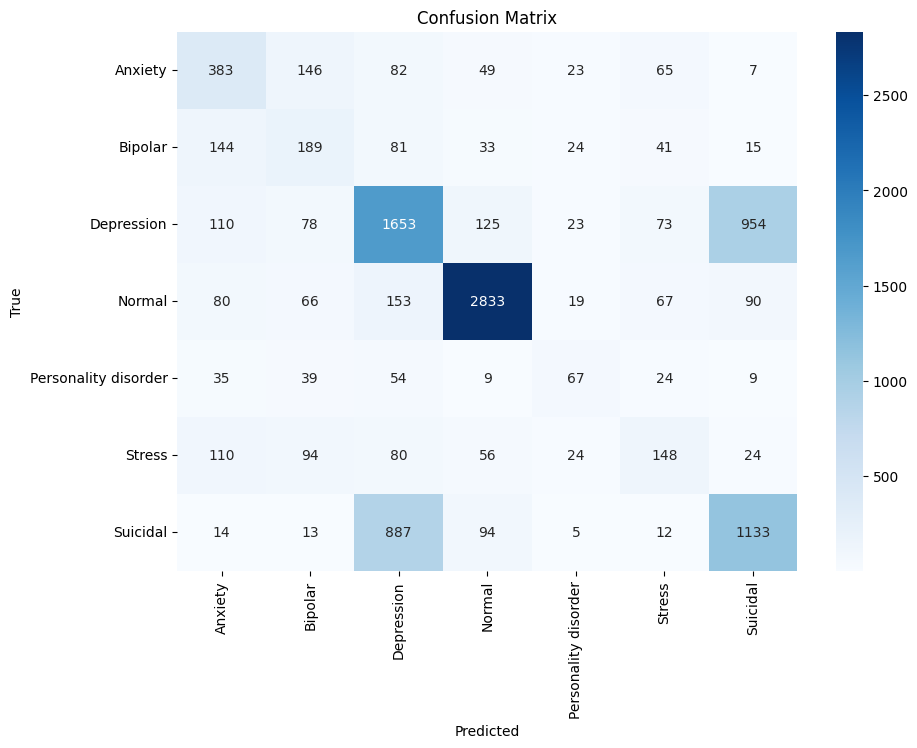


Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.44      0.51      0.47       755
             Bipolar       0.30      0.36      0.33       527
          Depression       0.55      0.55      0.55      3016
              Normal       0.89      0.86      0.87      3308
Personality disorder       0.36      0.28      0.32       237
              Stress       0.34      0.28      0.31       536
            Suicidal       0.51      0.53      0.52      2158

            accuracy                           0.61     10537
           macro avg       0.48      0.48      0.48     10537
        weighted avg       0.61      0.61      0.61     10537



In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 9. Prediksi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# 10. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.classes_

# 11. Visualisasi
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 12. Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))
